<a href="https://colab.research.google.com/github/alphalyncis/adaa/blob/main/img_analysis/HC_workshop_2023_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary packages
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage import filters
from skimage import morphology
from skimage.filters import threshold_otsu, threshold_local
from skimage.segmentation import clear_border
from skimage.morphology import disk
from scipy.ndimage import gaussian_filter
from google.colab.patches import cv2_imshow
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/imageanalysis2023/
path  = 'HC_stack.tif'

!pwd

/content/drive/MyDrive/imageanalysis2023
/content/drive/MyDrive/imageanalysis2023


The following cell contains some useful functions for image analysis:

In [6]:
def load_image_to_array(filename):
    ret, images = cv.imreadmulti(filename, flags=1)
    images_array = np.array(images)
    return images_array[:,:,:,0]

First, let's try load and visualize all the images.

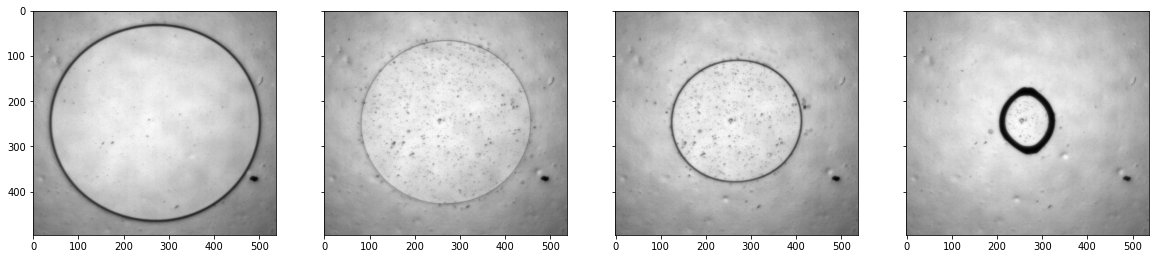

In [7]:
r_images = load_image_to_array(path)

fig, axs = plt.subplots(ncols = 4, figsize = (20,10), sharey=True)
axs[0].imshow(r_images[0],cmap='gray')
axs[1].imshow(r_images[1],cmap='gray')
axs[2].imshow(r_images[2],cmap='gray')
axs[3].imshow(r_images[3],cmap='gray')

These are 4 images from the same dataset, all with slightly different exposure, noise, a different shape and a fading ring. We want to track the area of each of these confined droplets, in a reliable algorithm that can tract the droplet in each frame. To achieve that, we need to do some image processing and we need to select the final shape. We will provide you with a toolbox, you will need to play with the order and parameters yourself to see whether you can make this work.

In [ ]:
#toolbox

#FILTERS
#gaussian filter
gaussian_filter(frame,sigma=) #scipy.ndimage
#median filter
filters.median(frame,footprint)#footprint = for instance disk(x) #skimage
#farfield correction 
ffc = (frame/gaussian_image)*np.mean(frame)

#THRESHOLDING
#general thresholding
threshold_image = frame > threshold
#automated thresholding
threshold_otsu(frame) #skimage

#MORPHOLOGICAL OPERATION
#small object removal
morphology.remove_small_objects(frame,limit) #skimage
#clear borders
clear_border(frame) #convert to integers #skimage
#erosion
morphology.binary_erosion(frame, footprint)#footprint = for instance disk(x) #skimage
#small hole removal
morphology.remove_small_holes(frame,limit) #skimage

SyntaxError: ignored

Now, let's try this out.

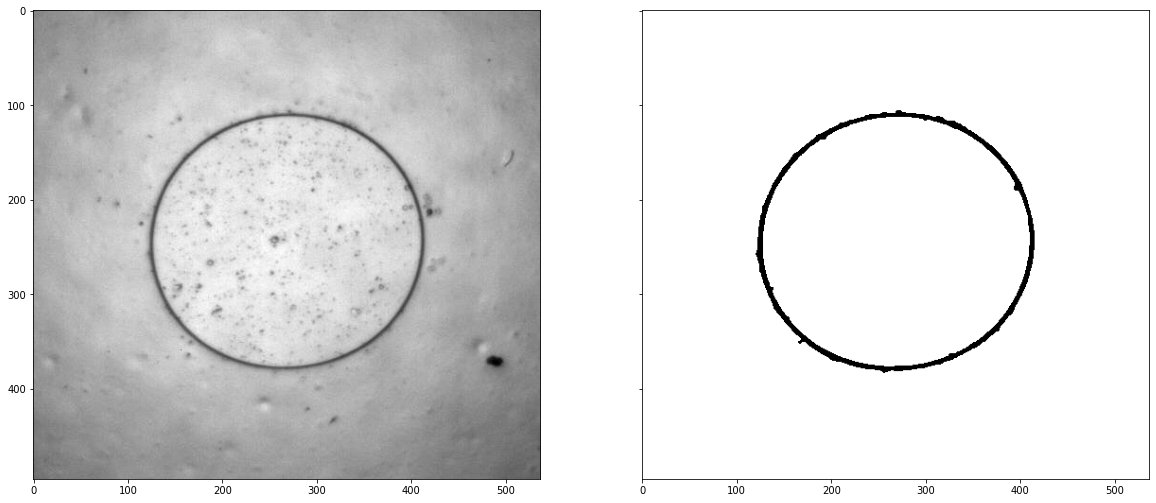

In [87]:
#TESTING IMAGE PROCESSING
#define frame you want to analyze
frame=2
#select image
image_start = r_images[frame]


#here, experiment with your processing steps, for instance


gaussian_bg = gaussian_filter(image_start,sigma=10)
processed_image = filters.median(image_start, disk(4))
ffc = (image_start/gaussian_bg)*np.mean(image_start)
processed_image = ffc>90
#processed_image = morphology.remove_small_objects(processed_image, 50)
processed_image = morphology.remove_small_holes(processed_image,300)
processed_image = filters.median(processed_image, disk(2))
#processed_image = gaussian_filter(processed_image,sigma=0.5)
#processed_image = morphology.binary_erosion(processed_image, disk(1))
#processed_image = clear_border(processed_image)





#let's see what this looks like
fig, axs = plt.subplots(ncols = 2, figsize = (20,10), sharey=True)
axs[0].imshow(image_start,cmap='gray')
axs[1].imshow(processed_image,cmap='gray')
#NOTE: you can add subplots by increasing ncols and plotting them in axs[x]

Feeling confident? Let's test your edge detection!

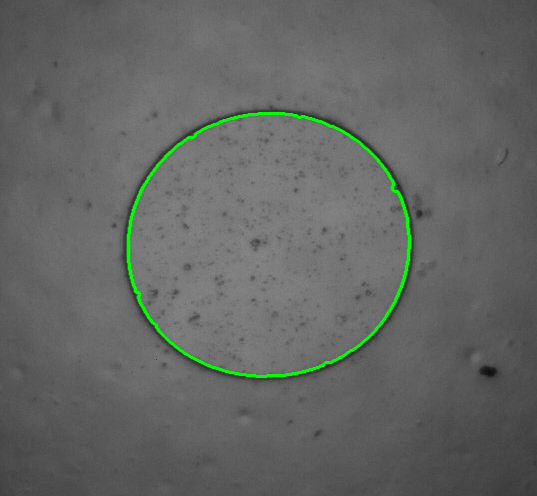

In [78]:
#TESTING DETECTION OF DROPLET
#load images for plotting
ret, images = cv.imreadmulti(path, flags=1)

#convert image to integers
#processed_image = image_start
processed_image = processed_image.astype(int).astype(np.uint8) #convert to integers

# detect the contours on the binary image using cv.CHAIN_APPROX_NONE
contours, hierarchy = cv.findContours(image=processed_image, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)

#empty array for storing contour areas
areaArray = []

if len(contours) > 0:
    #calculating all areas
    for i, c in enumerate(contours):
        area = cv.contourArea(c)
        areaArray.append(area)

    #first sort the array by area
    sorteddata = sorted(zip(areaArray, contours), key=lambda x: x[0], reverse=True)

    #select second largest contour
    largestcontour = sorteddata[2][1]

    # #calculate largest contour area
    largestcontour_area = cv.contourArea(largestcontour)

    #visualization
    # draw contours on the original image
    image_copy = images[frame].copy()
    cv.drawContours(image=image_copy, contours=largestcontour, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv.LINE_AA)
                
    # see the results
    cv2_imshow(image_copy)

If your tests went all right, you can now plot the areal evolution.

RuntimeError: ignored

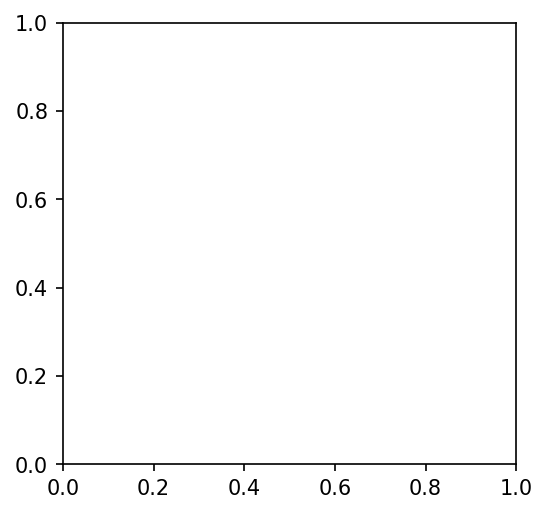

In [85]:
#TESTING DETECTION OF DROPLET

#create figure
fig, ax = plt.subplots(dpi=150,figsize=(3.9,3.9))

for frame, image in enumerate(images):

    # INSERT HERE YOUR IMAGE PROCESSING STEPS
    gaussian_bg = gaussian_filter(frame,sigma=10)
    processed_image = filters.median(frame, disk(4))
    ffc = (image_start/gaussian_bg)*np.mean(image_start)
    processed_image = ffc>90
    #processed_image = morphology.remove_small_objects(processed_image, 50)
    processed_image = morphology.remove_small_holes(processed_image,300)
    processed_image = filters.median(processed_image, disk(2))
    processed_image = processed_image.astype(int).astype(np.uint8) #convert to integers

    # detect the contours on the binary image using cv.CHAIN_APPROX_NONE
    contours, hierarchy = cv.findContours(image=processed_image, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)

    #empty array for storing contour areas
    areaArray = []

    if len(contours) > 0:

        #calculating all areas
        for i, c in enumerate(contours):
            area = cv.contourArea(c)
            areaArray.append(area)

        #first sort the array by area
        sorteddata = sorted(zip(areaArray, contours), key=lambda x: x[0], reverse=True)

        #select second largest contour
        largestcontour = sorteddata[0][1]

        # #calculate largest contour area
        largestcontour_area = cv.contourArea(largestcontour)
    
    print(largestcontour_area)
    ax.plot(frame,largestcontour_area,'k.')

ax.set_xlabel('time [frames]')
ax.set_ylabel(r'A [px]')
plt.show()
